In [22]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

with open("data/input.json", "r") as f:
    input_data = json.load(f)

image_paths = input_data["image_files"]
image_num = 2


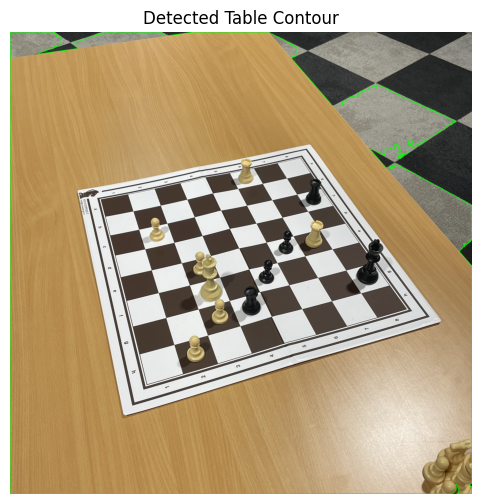

In [23]:
image = cv2.imread(image_paths[image_num])

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_brown = np.array([0, 22, 107])
upper_brown = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_brown, upper_brown)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

table_contour = max(contours, key=cv2.contourArea)

contour_image = image.copy()
cv2.drawContours(contour_image, [table_contour], -1, (0, 255, 0), 3)

contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Table Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


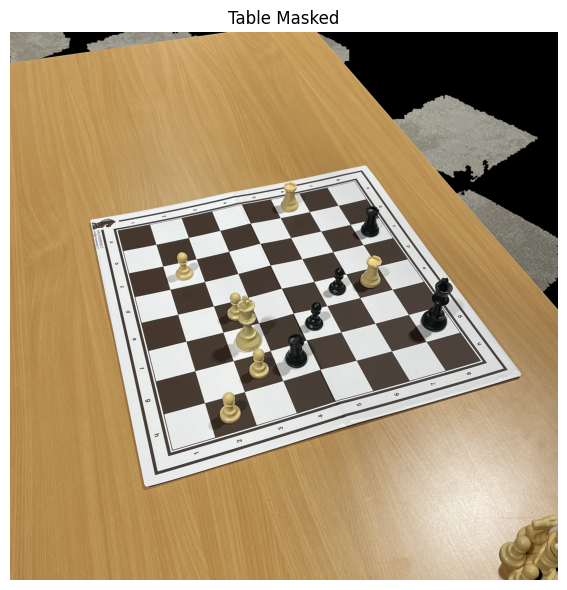

In [24]:
table_mask = np.zeros_like(image)
cv2.drawContours(table_mask, [table_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, table_mask)

masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Display both results side-by-side
plt.figure(figsize=(12, 6))

plt.plot(1, 2, 2)
plt.title("Table Masked")
plt.imshow(masked_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


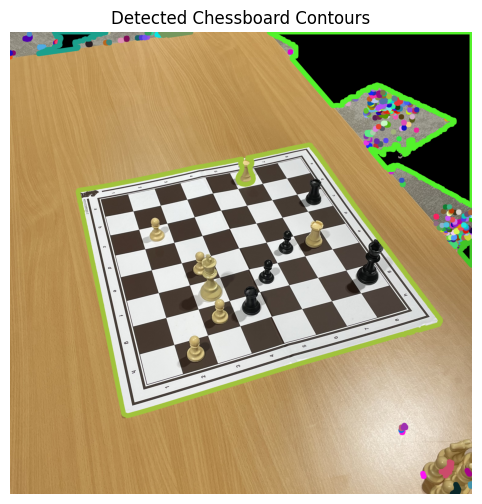

In [25]:
hsv = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)

table_color_mask = cv2.inRange(hsv, lower_brown, upper_brown)
chessboard_mask = cv2.bitwise_not(table_color_mask)

kernel = np.ones((3, 3), np.uint8)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_CLOSE, kernel)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_OPEN, kernel, iterations=2)

contours_, _ = cv2.findContours(chessboard_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
height, width = chessboard_mask.shape[:2]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours_:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()




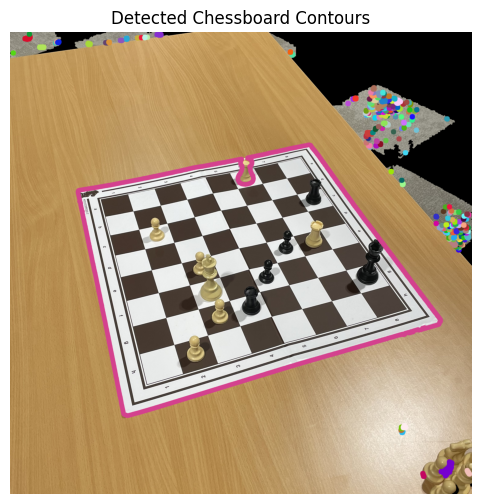

In [26]:

def is_touching_border(contour, width, height):
    for point in contour:
        x, y = point[0]
        if x <= 1 or y <= 1 or x >= width - 2 or y >= height - 2:
            return True
    return False

contours = [cnt for cnt in contours_ if not is_touching_border(cnt, width, height)]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


In [27]:
chessboard_countor = max(contours, key=cv2.contourArea)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [chessboard_countor], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

In [28]:
## aply mask to the image
chessboard_mask = np.zeros_like(image)
cv2.drawContours(chessboard_mask, [chessboard_countor], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, chessboard_mask)
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Chessboard Masked")
plt.imshow(masked_rgb)
plt.axis('off')
plt.show()

In [29]:
approx = cv2.approxPolyDP(chessboard_countor, 0.06 * cv2.arcLength(chessboard_countor, True), True)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Approx")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

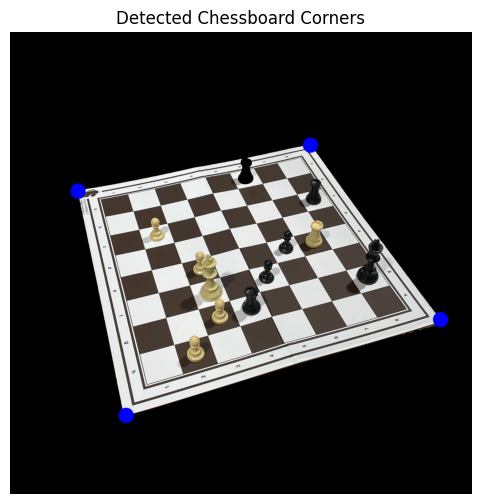

In [30]:
corners = approx.reshape(4, 2)
corners = corners[np.argsort(corners[:, 0])]


left_corners = corners[:2]

top_left = left_corners[np.argmin(left_corners[:, 1])]
bottom_left = left_corners[np.argmax(left_corners[:, 1])]

right_corners = corners[2:]
top_right = right_corners[np.argmin(right_corners[:, 1])]
bottom_right = right_corners[np.argmax(right_corners[:, 1])]


ordered_corners = [top_left, top_right, bottom_right, bottom_left]

# draw contours on the original image
corner_image = masked_image.copy()
for corner in ordered_corners:
    cv2.circle(corner_image, tuple(corner), 50, (255,0,0), -1)

corner_rgb = cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Corners")
plt.imshow(corner_rgb)
plt.axis('off')
plt.show()

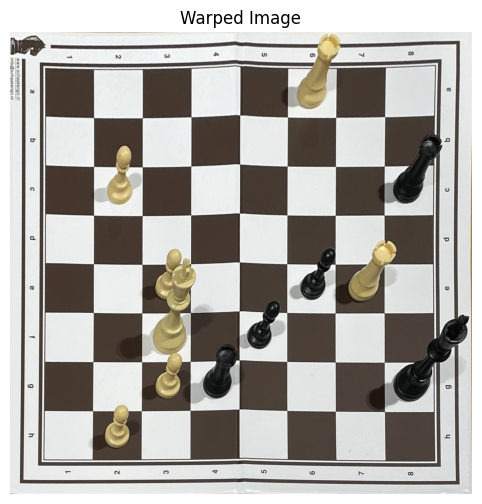

In [31]:
output_size = 3024

dst = np.array([
        [0, 0],
        [output_size - 1, 0],
        [output_size - 1, output_size - 1],
        [0, output_size - 1]
    ], dtype="float32")

M = cv2.getPerspectiveTransform(np.array(ordered_corners, dtype="float32"), dst)
warped = cv2.warpPerspective(image, M, (output_size, output_size))
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Warped Image")   
plt.imshow(warped_rgb)
plt.axis('off')
plt.show()

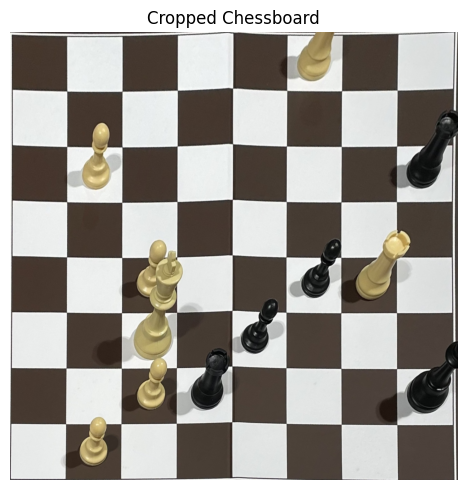

In [32]:
def crop_with_padding(image, padding=0):
    h, w = image.shape[:2]
    top = bottom = left = right = padding

    if padding > 0:
        top = bottom = left = right = padding

    cropped_image = image[top:h-bottom, left:w-right]
    return cropped_image

cropped_chessboard = crop_with_padding(warped, padding=220)

plt.figure(figsize=(10, 5))
plt.title("Cropped Chessboard")
plt.imshow(cv2.cvtColor(cropped_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

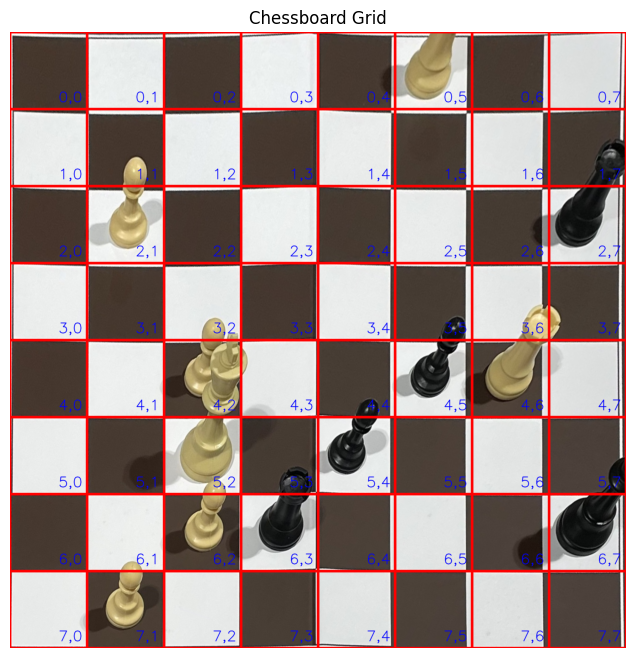

In [33]:
def draw_chess_grid(image, rows=8, cols=8):
    image_copy = image.copy()
    h, w = image.shape[:2]
    cell_height = h // rows
    cell_width = w // cols

    cell_coords = []

    for i in range(rows):
        for j in range(cols):
            x1, y1 = j * cell_width, i * cell_height
            x2, y2 = (j + 1) * cell_width, (i + 1) * cell_height

            cell_coords.append({
                "row": i,
                "col": j,
                "bbox": (x1, y1, x2, y2)
            })

            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 10) 
            cv2.putText(image_copy, f"{i},{j}", (x2 - 120, y2 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA) 

    return image_copy, cell_coords



annotated_image, grid_info = draw_chess_grid(cropped_chessboard)

plt.figure(figsize=(8, 8))
plt.title("Chessboard Grid")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [34]:
def detect_pieces_by_center_multi(image, grid_info, patch_size=12, threshold_diff=35, offset_y=10):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    directions = [(0, 0), (-offset_y, 0), (offset_y, 0), (0, -offset_y), (0, offset_y)]

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        cx = (x1 + x2) // 2
        cy = (y1 + y2) // 2
        bg_intensity = np.mean(gray[y1:y2, x1:x2])

        for dy, dx in directions:
            px, py = cx + dx, cy + dy
            ps = patch_size // 2

            if py - ps < 0 or py + ps > h or px - ps < 0 or px + ps > w:
                continue

            patch = gray[py - ps:py + ps, px - ps:px + ps]
            diff = abs(np.mean(patch) - bg_intensity)

            if diff > threshold_diff:
                piece_positions.append({
                    "row": cell["row"],
                    "col": cell["col"],
                    "intensity_diff": diff
                })

                for dy2, dx2 in directions:
                    cv2.circle(image_copy, (cx + dx2, cy + dy2), 3, (0, 0, 255), 10)

                cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image_copy, "P", (x1 + 5, y1 + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
                break

    return image_copy, piece_positions



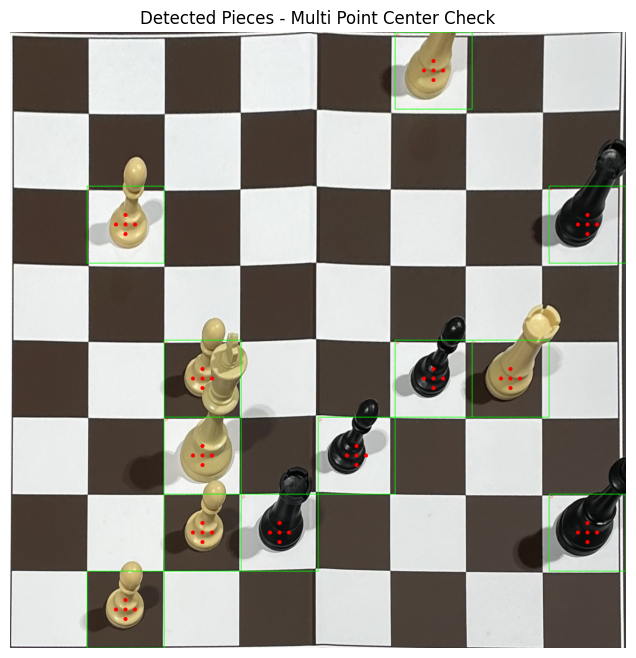

Piece found at row 0, col 5 with intensity difference 49.25698731097458
Piece found at row 2, col 1 with intensity difference 49.333257385024524
Piece found at row 2, col 7 with intensity difference 114.0834089488275
Piece found at row 4, col 2 with intensity difference 59.313644150289505
Piece found at row 4, col 5 with intensity difference 122.28352355688892
Piece found at row 4, col 6 with intensity difference 60.58817638592018
Piece found at row 5, col 2 with intensity difference 47.36474617955378
Piece found at row 5, col 4 with intensity difference 110.30644437042648
Piece found at row 6, col 2 with intensity difference 50.73840526922844
Piece found at row 6, col 3 with intensity difference 126.33475511762471
Piece found at row 6, col 7 with intensity difference 100.36700612432251
Piece found at row 7, col 1 with intensity difference 86.26934931269777


In [35]:

img_with_pieces, pieces = detect_pieces_by_center_multi(cropped_chessboard, grid_info, offset_y= 40)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_pieces, cv2.COLOR_BGR2RGB))
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

for piece in pieces:
    print(f"Piece found at row {piece['row']}, col {piece['col']} with intensity difference {piece['intensity_diff']}")

In [36]:
def detect_pieces_by_center_multi(image, grid_info, patch_size=12, threshold_diff=35, offset_y=10):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    directions = [(0, 0), (-offset_y, 0), (offset_y, 0), (0, -offset_y), (0, offset_y)]

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        
        # Recortar toda a área da célula
        cell_patch = gray[y1:y2, x1:x2]
        
        # Aplicar Canny para detectar bordas na célula inteira
        blurred = cv2.GaussianBlur(cell_patch, (3, 3), 0)  # Desfoque para reduzir ruído
        edges = cv2.Canny(blurred, 50, 150)  # Detectar bordas com Canny
        
        # Exibir o resultado do Canny (opcional para depuração)
      

        # Encontrar contornos nas bordas detectadas
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        has_piece = False
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 30:  # Ignorar contornos muito pequenos
                has_piece = True
                break  # Encontrou contorno significativo, podemos sair

        if has_piece:
            piece_positions.append({
                "row": cell["row"],
                "col": cell["col"],
                "intensity_diff": None  # Não estamos usando a diferença de intensidade aqui, pois estamos com contornos
            })

            # Desenhar a célula onde a peça foi detectada
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Caixa verde
            cv2.putText(image_copy, "P", (x1 + 5, y1 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)

            # Opcional: desenhar um círculo no centro da célula
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.circle(image_copy, (cx, cy), 3, (0, 0, 255), 10)

    return image_copy, piece_positions

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_single_piece_per_cell(image, grid_info, patch_size=12, threshold_diff=35, offset_y=10):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        
        # Recortar toda a área da célula
        cell_patch = gray[y1:y2, x1:x2]
        
        # Aplicar Canny para detectar bordas na célula inteira
        blurred = cv2.GaussianBlur(cell_patch, (3, 3), 0)
        edges = cv2.Canny(blurred, 50, 150)

        # Encontrar contornos nas bordas detectadas
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # DEBUG: printar contornos encontrados
        if cell["row"] == 0 and cell["col"] == 6:
            print(f"\n[Célula {cell['row']}, {cell['col']}] - {len(contours)} contornos encontrados.")
            for i, cnt in enumerate(contours):
                print(f"  Contorno {i}: área = {cv2.contourArea(cnt)}")
                print(f"  Pontos do contorno {i}: {cnt.reshape(-1, 2)}")

        has_piece = False
        inside_cell = True
        mid_area_detcted = False
        top_1 = False
       
        for cnt in contours:
            area = cv2.contourArea(cnt)
            
            if area > 1 and area < (x2 - x1) * (y2 - y1):
                for point in cnt:
                    px, py = point[0]
                    if py > 160 and py < 168 and px > 40 and px < 280:
                        inside_cell = True

                cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
                
                t_t = False
                t_b = False
              
                for point in cnt:
                    px, py = point[0]
                    px_global = px + x1
                    py_global = py + y1
                    if py <= 170:
                        t_t = True
                    if py >= y2-y1-40:
                        t_b = True
                    if t_b and t_t:
                        continue    
                 

                    # Debug apenas para uma célula específica
                    if cell["row"] == 0 and cell["col"] == 6:
                        print(f"  >> px_global: {px_global}, py_global: {py_global}, cx: {cx}, cy: {cy}")
                        print(f"  >> Local py: {py}, px: {px}")

                    if py < 60 and py > 40 and px > 40 and px < 280:
                        top_1 = True

                    if (cx - 80 <= px_global <= cx + 80) and (cy - 80 <= py_global <= cy + 80):
                        mid_area_detcted = True
                        break
                   
                if  mid_area_detcted and top_1:
                    has_piece = True
                    break

        if has_piece:
            piece_positions.append({
                "row": cell["row"],
                "col": cell["col"],
            })

            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 50)
            cv2.putText(image_copy, "P", (x1 + 5, y1 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.circle(image_copy, (cx, cy), 3, (0, 0, 255), 40)

    return image_copy, piece_positions


In [38]:

img_with_pieces, pieces = detect_single_piece_per_cell(cropped_chessboard, grid_info)

matrix = np.zeros((8, 8), dtype=int)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_pieces, cv2.COLOR_BGR2RGB))
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

for piece in pieces:
    matrix[piece["row"], piece["col"]] = 1
    print(f"Piece found at row {piece['row']}, col {piece['col']}")


[Célula 0, 6] - 4 contornos encontrados.
  Contorno 0: área = 1.5
  Pontos do contorno 0: [[308  14]
 [307  15]
 [304  15]
 [303  16]
 [303  18]
 [302  19]
 [302  39]
 [301  40]
 [301  42]
 [302  43]
 [302  49]
 [301  50]
 [301  51]
 [302  52]
 [302  58]
 [301  59]
 [301  92]
 [300  93]
 [300  95]
 [301  96]
 [301 103]
 [300 104]
 [300 125]
 [301 126]
 [300 127]
 [300 151]
 [299 152]
 [300 153]
 [300 156]
 [299 157]
 [299 158]
 [300 159]
 [300 160]
 [299 161]
 [299 214]
 [298 215]
 [298 216]
 [299 217]
 [299 219]
 [298 220]
 [298 276]
 [297 277]
 [297 278]
 [298 279]
 [298 286]
 [297 287]
 [297 322]
 [297 287]
 [298 286]
 [298 279]
 [297 278]
 [297 277]
 [298 276]
 [298 220]
 [299 219]
 [299 217]
 [298 216]
 [298 215]
 [299 214]
 [299 161]
 [300 160]
 [300 159]
 [299 158]
 [299 157]
 [300 156]
 [300 153]
 [299 152]
 [300 151]
 [300 127]
 [301 126]
 [300 125]
 [300 104]
 [301 103]
 [301  96]
 [300  95]
 [300  93]
 [301  92]
 [301  59]
 [302  58]
 [302  52]
 [301  51]
 [301  50]
 [302  

Piece found at row 0, col 5
Piece found at row 2, col 1
Piece found at row 2, col 7
Piece found at row 4, col 2
Piece found at row 4, col 5
Piece found at row 4, col 6
Piece found at row 5, col 2
Piece found at row 5, col 4
Piece found at row 6, col 2
Piece found at row 6, col 3
Piece found at row 6, col 7
Piece found at row 7, col 1


In [39]:
def classify_piece_color(image, grid_info, piece_positions, patch_size=12, threshold_brightness=130):
    colors = {}
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, w = hsv.shape[:2]
    image_copy = image.copy()

    for piece in piece_positions:
        r, c = piece["row"], piece["col"]

        cell = next(cell for cell in grid_info if cell["row"] == r and cell["col"] == c)
        x1, y1, x2, y2 = cell["bbox"]
        cx = (x1 + x2) // 2
        cy = (y1 + y2) // 2

        ps = patch_size // 2
        if cy-ps < 0 or cy+ps > h or cx-ps < 0 or cx+ps > w:
            continue

        patch = hsv[cy-ps:cy+ps, cx-ps:cx+ps]
        mean_v = np.mean(patch[:, :, 2])

        color = "white" if mean_v > threshold_brightness else "black"
        colors[(r, c)] = color

        box_color = (255, 255, 255) if color == "white" else (0, 0, 0)

        cv2.rectangle(image_copy, (x1, y1), (x2, y2), box_color, 30)

    return image_copy, colors


colored_img, piece_colors = classify_piece_color(cropped_chessboard, grid_info, pieces)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(colored_img, cv2.COLOR_BGR2RGB))
plt.title("Classified Pieces - White / Black")
plt.axis("off")
plt.show()

for (row, col), color in piece_colors.items():
    print(f"Piece at ({row}, {col}) is {color}")




Piece at (0, 5) is white
Piece at (2, 1) is white
Piece at (2, 7) is black
Piece at (4, 2) is white
Piece at (4, 5) is black
Piece at (4, 6) is white
Piece at (5, 2) is white
Piece at (5, 4) is black
Piece at (6, 2) is white
Piece at (6, 3) is black
Piece at (6, 7) is black
Piece at (7, 1) is white


In [40]:
# Load images
knight_gray = cv2.imread("knight2.png", cv2.IMREAD_GRAYSCALE)
knight_color = cv2.imread("knight2.png")
chessboard_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
chessboard_color = warped.copy()

# SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(knight_gray, None)
kp2, des2 = sift.detectAndCompute(chessboard_gray, None)

# FLANN matcher
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Ratio test (Lowe's criterion)
good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]

# Draw matches
match_output = cv2.drawMatches(
    knight_color, kp1, chessboard_color, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0)
)

# Estimate knight position
if good_matches:
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)
    knight_pos = np.median(dst_pts, axis=0).astype(int)

    cv2.circle(chessboard_color, tuple(knight_pos), 30, (0, 0, 255), 3)
    cv2.putText(chessboard_color, "Knight", (knight_pos[0] + 40, knight_pos[1]),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Matches")
plt.imshow(cv2.cvtColor(match_output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Knight Position")
plt.imshow(cv2.cvtColor(chessboard_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

# Output position
if good_matches:
    print(f"Knight found at position: {tuple(knight_pos)}")
else:
    print("Knight not found – try adjusting the ratio threshold.")


Knight found at position: (117, 60)


In [41]:
def rotate_knight_to_bottom_left(image, knight_pos):
    h, w = image.shape[:2]
    cx, cy = w // 2, h // 2
    
    x, y = knight_pos 

    print(f"Knight position: ({x}, {y}) | Center: ({cx}, {cy})")

    if x < cx and y < cy:
        angle = 90  
    elif x >= cx and y < cy:
        angle = 180 
    elif x >= cx and y >= cy:
        angle = 270 
    else:
        angle = 0  

    print(f"Rotating {angle}º to place the knight in the bottom-left corner")

    if angle == 90:
        rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    elif angle == 180:
        rotated = cv2.rotate(image, cv2.ROTATE_180) 
    elif angle == 270:
        rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) 
    else:
        rotated = image.copy() 

    return rotated, angle


rotated_chessboard, rotation_angle = rotate_knight_to_bottom_left(warped, knight_pos)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Chessboard")
plt.imshow(warped_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Rotated Chessboard")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

Knight position: (117, 60) | Center: (1512, 1512)
Rotating 90º to place the knight in the bottom-left corner


In [42]:
# Since we now dont rotate the image according to the knight position because its easier to detect the pieces in the chessboard, so we need to rotate the matrix according to the rotation angle

print("Matrix before rotation:\n")
print(matrix)
print("\n")

if rotation_angle == 90:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=1)
elif rotation_angle == 180:
    print(f"Rotating the matrix {rotation_angle}º")
    matrix = np.rot90(matrix, k=2)
elif rotation_angle == 270:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=3)
else:
    print(f"No rotation needed for the matrix.\n")

print("Matrix after rotation:\n")
print(matrix)


plt.figure(figsize=(8, 8))
plt.title("Rotated Image")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Matrix before rotation:

[[0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 0]
 [0 0 1 0 1 0 0 0]
 [0 0 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 0]]


Rotating the matrix 90º Counterclockwise
Matrix after rotation:

[[0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0]
 [0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
